## Conjunto de dados economicos do Brasil
##### Pib Per Capita das UF's de 2013 a 2016

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Lendo a base
BaseDados = pd.read_excel('Dados_Pib.xlsx')

In [3]:
BaseDados.head()

,Territorialidades,Ano,PIB per capita
0,Brasil,2013,22.20
1,Acre,2013,12.37
2,Alagoas,2013,9.45
3,Amapá,2013,14.53
4,Amazonas,2013,18.25


In [4]:
BaseDados.info()
#Verificando que os dados estão no formato correndo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Territorialidades  112 non-null    object 
 1   Ano                112 non-null    int64  
 2   PIB per capita     112 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.8+ KB


In [23]:
#Agrupando por UF e vendo a media deles nesses quatro anos
Mediageral = BaseDados.groupby('Territorialidades').agg({'PIB per capita': 'mean'})
Mediageral = Mediageral.sort_values(by='PIB per capita', ascending=False) #Organizando pelo PIB maior
Mediageral

,PIB per capita
Territorialidades,
Distrito Federal,53.2925
São Paulo,31.9725
Rio de Janeiro,29.6275
Santa Catarina,26.6800
Rio Grande do Sul,24.6525
Paraná,24.5500
Mato Grosso,24.1975
Espírito Santo,23.0025
Mato Grosso do Sul,22.8025


In [20]:
#Agrupando por UF e por ano para ver de cada estado
BaseDados.groupby(by=['Territorialidades', 'Ano']).mean()

PIB per capita
Territorialidades Ano                 
Acre              2013           12.37
                  2014           13.41
                  2015           12.24
                  2016           11.18
Alagoas           2013            9.45
...                                ...
São Paulo         2016           30.24
Tocantins         2013           13.47
                  2014           13.77
                  2015           13.79
                  2016           13.68

[112 rows x 1 columns]

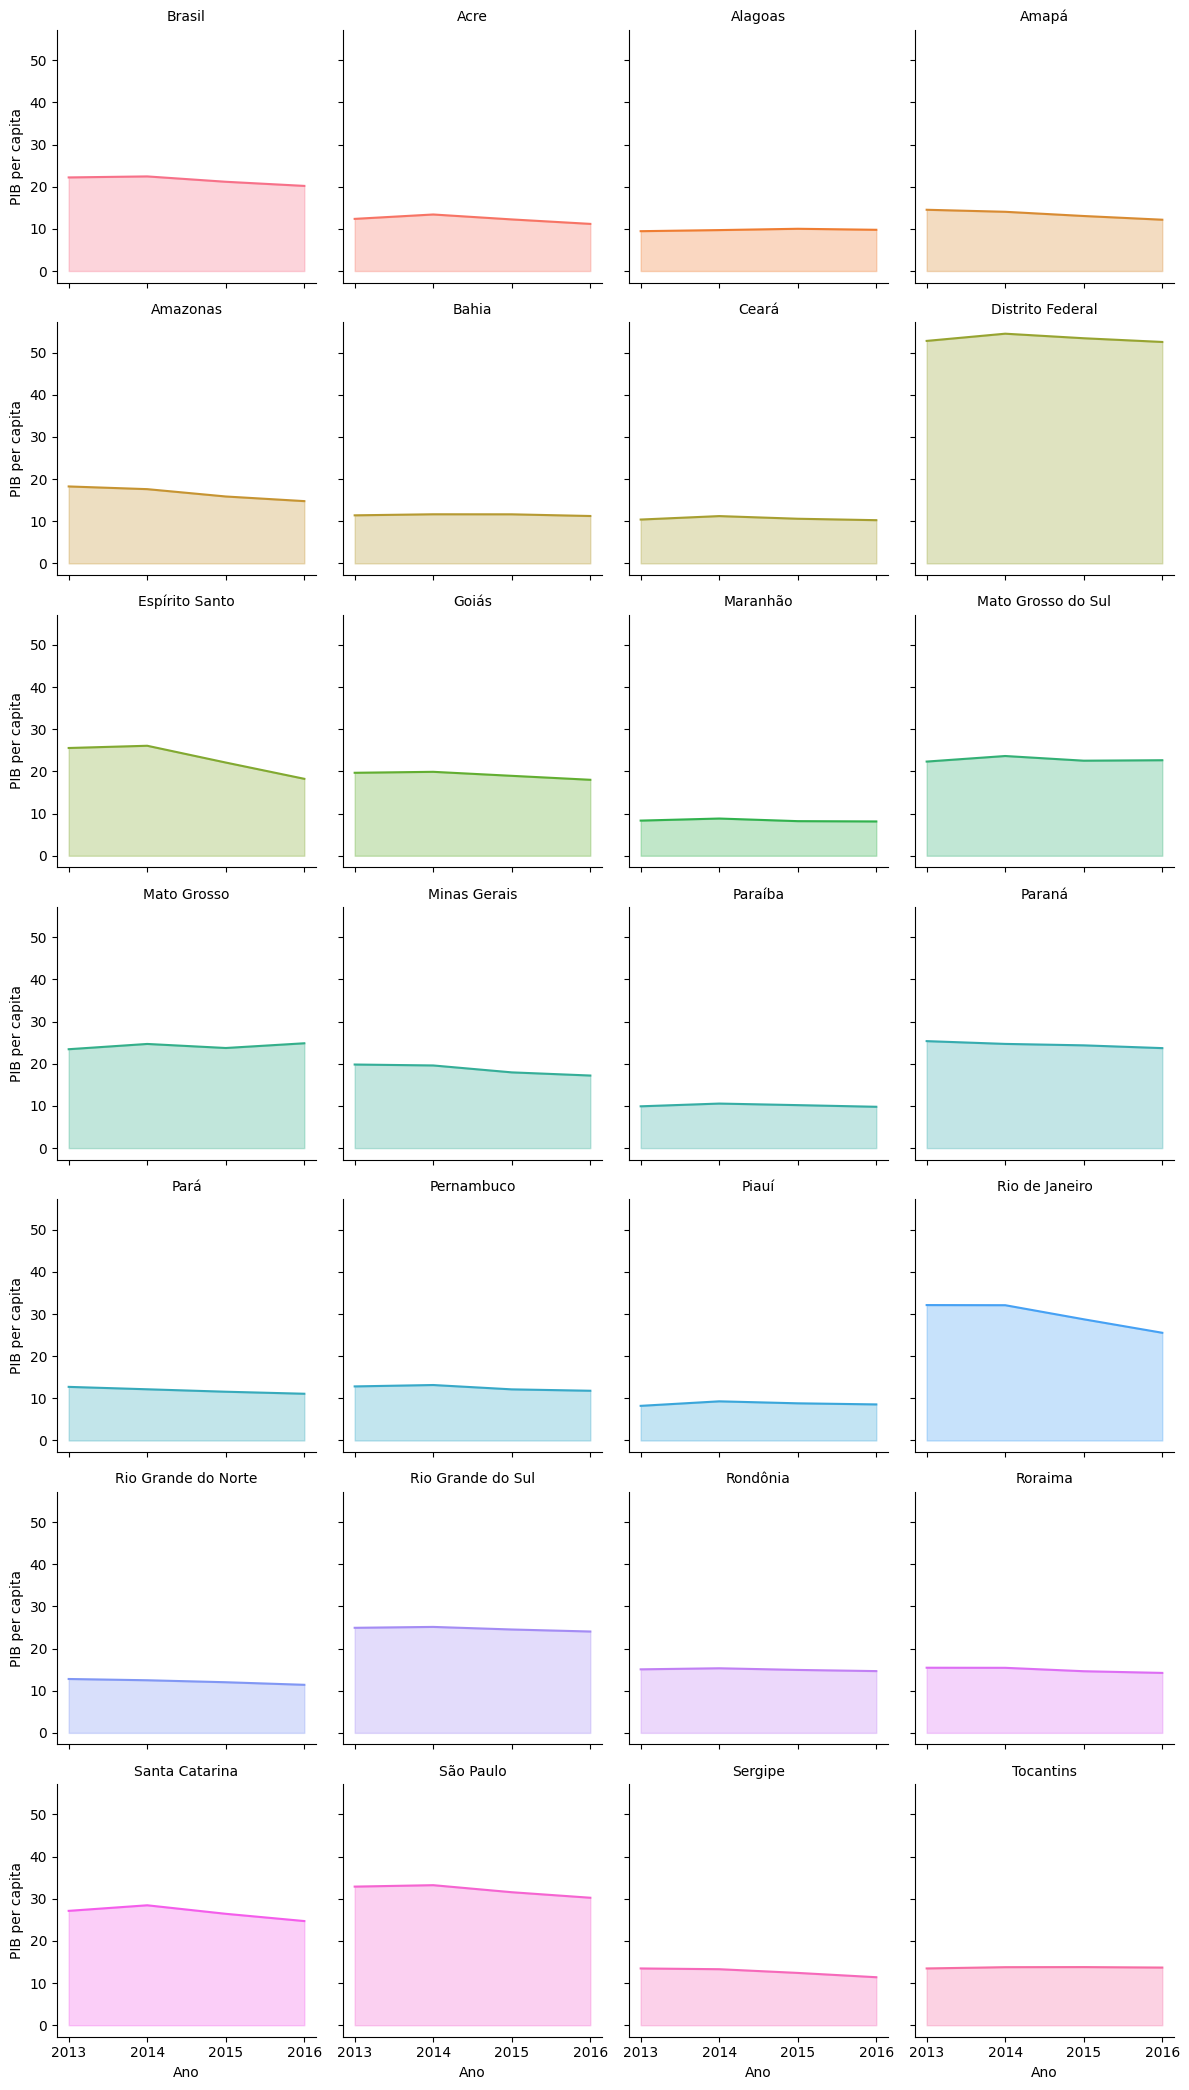

In [6]:
#Sistema de Grids

#cor de fundo
corFundo = '#f5f5f5'

#Criar o sistema de Grids
GridGraficos = sns.FacetGrid(BaseDados, col='Territorialidades', hue='Territorialidades', col_wrap=4)

#Adicionar gráfico de linhas em cada gráfico
GridGraficos = GridGraficos.map(plt.plot, 'Ano', 'PIB per capita')

#Adicionar uma sombra, só para estética
GridGraficos = GridGraficos.map(plt.fill_between, 'Ano', 'PIB per capita', alpha=0.3).set_titles('{col_name}') #o set Titles no final deixa só o nome da coluna como título

In [7]:
BaseDados['Territorialidades'].nunique(0)

28

In [8]:
#Vendo o maior PIB
BaseDados.loc[BaseDados['PIB per capita'].idxmax()]
#Foi o DF, no ano de 2014

,35
Territorialidades,Distrito Federal
Ano,2014
PIB per capita,54.48


In [9]:
#Vendo o menor PIB
BaseDados.loc[BaseDados['PIB per capita'].idxmin()]
#Foi o do Maranhão no ano de 2016

,94
Territorialidades,Maranhão
Ano,2016
PIB per capita,8.14


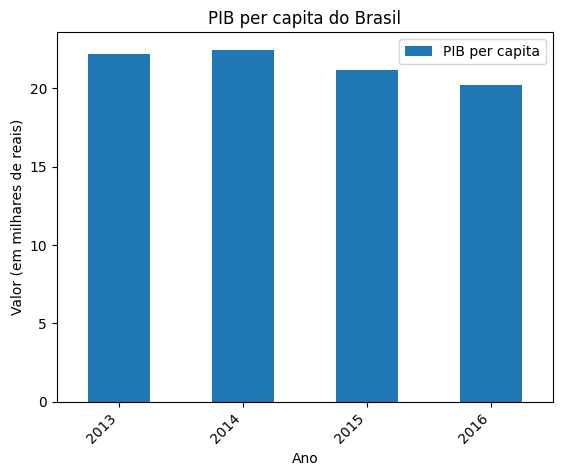

In [10]:
#Analisando o PIB per capita do Brasil
PIBBrasil = BaseDados[BaseDados['Territorialidades'].isin(['Brasil'])]
PIBBrasil.plot(x = 'Ano', y='PIB per capita', kind='bar')
plt.ylabel('Valor (em milhares de reais)')
plt.xticks(rotation=45, ha='right');
plt.title('PIB per capita do Brasil');

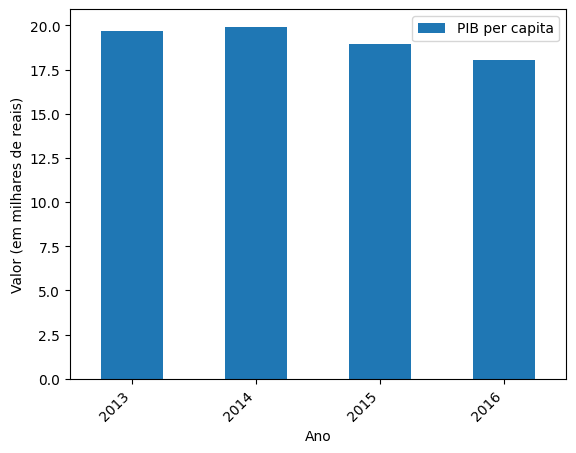

In [11]:
#Analisando o PIB per capita de Goiás
PIBGoias = BaseDados[BaseDados['Territorialidades'].isin(['Goiás'])]
PIBGoias.plot(x = 'Ano', y='PIB per capita', kind='bar')
plt.ylabel('Valor (em milhares de reais)')
#plt.bar(PIBGoias['Ano'], PIBGoias['PIB per capita']);
plt.xticks(rotation=45, ha='right');

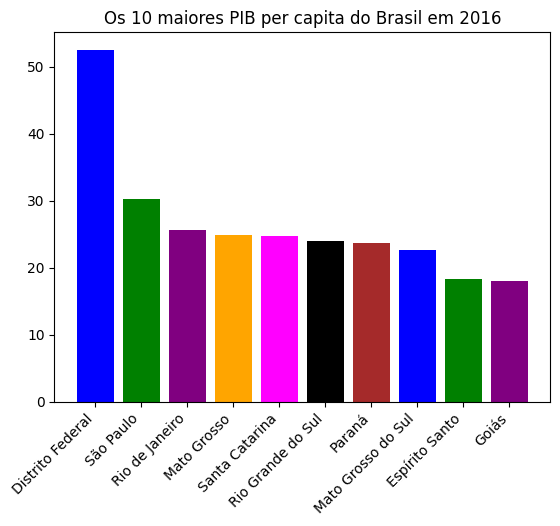

In [12]:
#Ranking dos 10 maiores PIB's de 2016
#pib2016 = BaseDados[BaseDados['Ano'].isin([2016])]
pib2016 = BaseDados.query("Ano == 2016 and Territorialidades != 'Brasil'")#Filtrando só pelo ano 2016 e q nao seja o Brasil
pib2016 = pib2016.sort_values(by='PIB per capita', ascending=False) #Organizando os valores em forma decrescente
top10 = pib2016.head(10).reset_index()
top10.index = top10.index + 1 #Deixando o index começar com 1 em vez de 0

#fazendo o gráfico
colors = ['blue', 'green', 'purple', 'orange', 'magenta', 'black', 'brown'] #Somente estética
plt.bar(top10['Territorialidades'], top10['PIB per capita'], color=colors)
plt.xticks(rotation=45, ha='right')
plt.title('Os 10 maiores PIB per capita do Brasil em 2016');